In [14]:
from pathlib import Path

import imageio.v3 as iio
import matplotlib.pyplot as plt
import numpy as np

from afdme import log

In [15]:
raw_video_files = list(Path("media/no_preds").glob("*.mp4"))
contour_video_files = [Path("media/contour_det/intensity_filter.mp4")]
assoc_video_files = [Path("media/association_det/intensity_filter.mp4")]
mask_files = list(Path("media/masks").glob("*.mp4"))

pipeline_video_files = (
    raw_video_files + contour_video_files + assoc_video_files + mask_files
)
log.info(pipeline_video_files)

[PosixPath('media/no_preds/denoise_filter.mp4'), PosixPath('media/no_preds/original.mp4'), PosixPath('media/no_preds/intensity_filter.mp4'), PosixPath('media/no_preds/turbine_filter.mp4'), PosixPath('media/no_preds/mean_filter.mp4'), PosixPath('media/contour_det/intensity_filter.mp4'), PosixPath('media/association_det/intensity_filter.mp4'), PosixPath('media/masks/hsv.mp4'), PosixPath('media/masks/mean_filter_mask.mp4'), PosixPath('media/masks/intensity_filter_mask.mp4')]


/Users/nowa201/Software/miniconda3/envs/afdme/lib/python3.9/site-packages/imageio/core/request.py:267: UserWarning: The usage of `format_hint` is deprecated and will be removed in ImageIO v3. Use `extension` instead.
  warnings.warn(


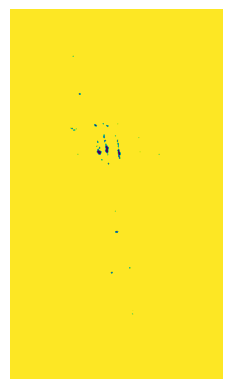

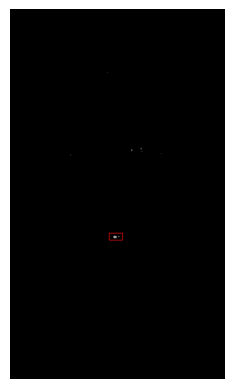

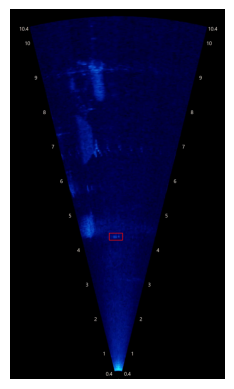

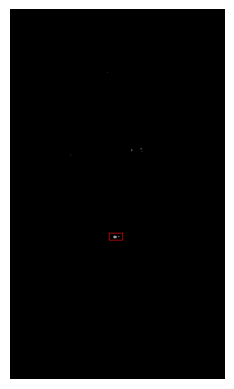

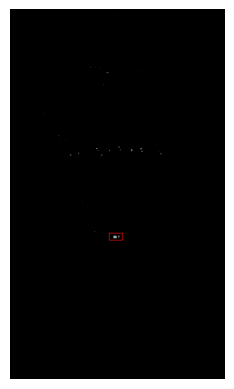

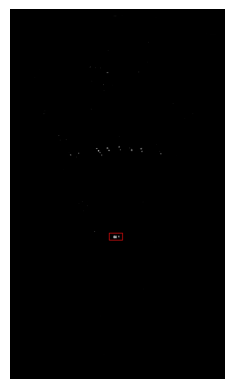

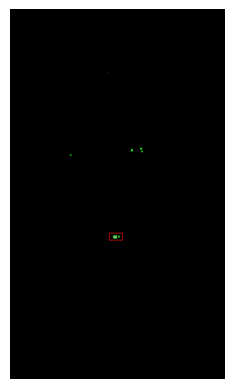

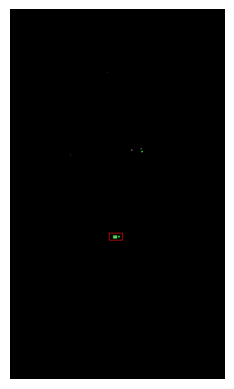

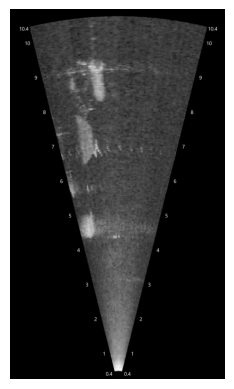

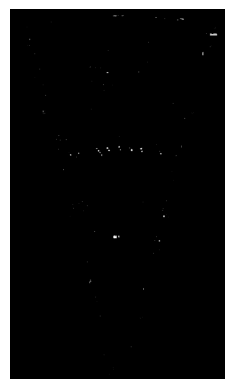

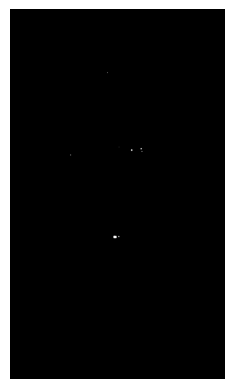

In [33]:
idx = 29

turbine_filter_mask = Path("media/masks/turbine_filter_mask.png")
tf_img = iio.imread(turbine_filter_mask, mode="L")
inv_tf_img = (np.abs(tf_img.astype(np.float32) - 255.0)).astype(np.uint8)
iio.imwrite(
    "media/pipeline_imgs/inv_turbine_filter_mask.png", inv_tf_img, format_hint=".png"
)
log.info("this is saving correctly, but displaying incorrectly")
plt.imshow(inv_tf_img), plt.axis("off"), plt.show()

pipeline_imgs = []
for video in pipeline_video_files:
    img = iio.imread(video, index=idx)
    pipeline_imgs.append(img)
    plt.imshow(img), plt.axis("off"), plt.show()

In [ ]:
for i, img in enumerate(pipeline_imgs):
    iio.imwrite(
        f"media/pipeline_imgs/{pipeline_video_files[i].name}-{pipeline_video_files[i].parents[0].name}-{idx}.png",
        img,
        extension=".png",
    )